# Proyecto
## TEL-354: Minería de Datos 2022-1 
### Prof. Mauricio Araya

## Shootings USA

Tenemos 2000 datos desde el 2016 al 2021 lo que nos da una proporcion de 1.3 tiroteos diarios

este dataset nos puede serivir como contexto hasta el 2017, de como evoluciono los tiroteos del 66 al 2017

al parecer es el data actualizado del dataset anterior 

misma que ver 3 pero con mas columnas de datos, habria que limpiar el dataset para ver si son empleados, a primera vista no nos dara info importante ademas no todos son trabajadores, habria que generar disstintas columnas para analizarlas por tipos

In [101]:
import pandas as pd
df_shooting5=pd.read_csv('Mass_Shootings_Dataset_Ver5.csv', encoding= 'unicode_escape')
deep_copy = df_shooting5.copy()
deep_copy.pop('Latitude')
deep_copy.pop('Longitude')
deep_copy.pop('Summary')
deep_copy.pop('Employed at')

deep_copy.pop('Open/Close Location')
deep_copy.pop('Title')
deep_copy.pop('Location')
deep_copy.pop('Incident Area')
deep_copy.pop('Policeman Killed')
deep_copy.pop('Date')
deep_copy.pop('Race')
deep_copy.pop('Age')
deep_copy.pop('Target')

deep_copy

,S#,Cause,Fatalities,Injured,Total victims,Employeed (Y/N),Mental Health Issues,Gender
0,1,unknown,26,20,46,NaN,No,M
1,2,unknown,3,0,3,NaN,No,M
2,3,unknown,3,3,6,NaN,No,M
3,4,unknown,59,527,585,NaN,Unclear,M
4,5,NaN,3,2,5,1.0,Yes,M
...,...,...,...,...,...,...,...,...
318,319,anger,1,3,4,NaN,Yes,Male
319,320,psycho,10,13,22,NaN,Yes,Male
320,321,terrorism,2,4,5,NaN,Yes,Male
321,322,terrorism,5,1,6,NaN,Yes,Male


esta es la version final de los datases, le agregan mas datos y acutalizan los datos

Tuvimos que buscar una nueva data por registrar xq eliminaron las csv

##### nuestro objetivo es descubrir si las causantes de los tirotes de usa, es la salud mental, obteniendo esta info a traves de los dataset de kaggle con datos realcionados con la salud mental con datos como si tenia problemas, la causa del tiroteo

Actualizacion: usaremos el ver5 para el contexto y con el de la actualidad 2000 filas

## buscar el dataset de la salud mental en usa y empezar el analisis

In [102]:
deep_copy.columns.values

array(['S#', 'Cause', 'Fatalities', 'Injured', 'Total victims',
       'Employeed (Y/N)', 'Mental Health Issues', 'Gender'], dtype=object)

In [59]:
df_shooting5.groupby(['Mental Health Issues']).mean()

,S#,Fatalities,Injured,Total victims,Employeed (Y/N)
Mental Health Issues,,,,,
No,195.956989,3.903226,3.408602,6.967742,0.592593
Unclear,67.076923,12.769231,50.000000,62.692308,1.000000
Unknown,94.027273,2.536364,3.281818,5.472727,0.833333
Yes,214.905660,5.811321,6.283019,11.698113,0.535714
unknown,107.000000,9.000000,1.000000,10.000000,NaN


In [103]:
#los que tienen problemas de salud mental
df_shooting5_mentalYes=deep_copy[deep_copy['Mental Health Issues']=='Yes']
df_shooting5_mentalNo=deep_copy[deep_copy['Mental Health Issues']=='No']
df_shooting5_mentalUnknown=deep_copy[deep_copy['Mental Health Issues']=='Unknown']
df_shooting5_mentalUnclear=deep_copy[deep_copy['Mental Health Issues']=='Unclear']
#shootings = pd.concat([df_shooting5_mentalYes, df_shooting5_mentalNo])
shootings = pd.concat([df_shooting5_mentalYes, df_shooting5_mentalNo,df_shooting5_mentalUnknown,df_shooting5_mentalUnclear])
#shootings
#df_shooting5_mentalYes.groupby(['Target']).mean()

In [99]:
#Matriz correlación
import seaborn as sns
import matplotlib.pyplot as plt
def plot_corr_matrix(data,features=None,annot=True,s=(25,25)):
    fig= plt.figure(figsize=s)
    ax= fig.add_subplot(111)
    if features is None:
        corr = data.corr()
    else:
        corr = data[features].corr()
    ax= sns.heatmap(corr,annot=annot,
        xticklabels=corr.columns,
    yticklabels=corr.columns, cmap="seismic",vmin=-1,vmax=1)
    plt.title("Correlation Matrix", fontsize = 60)
    plt.show()

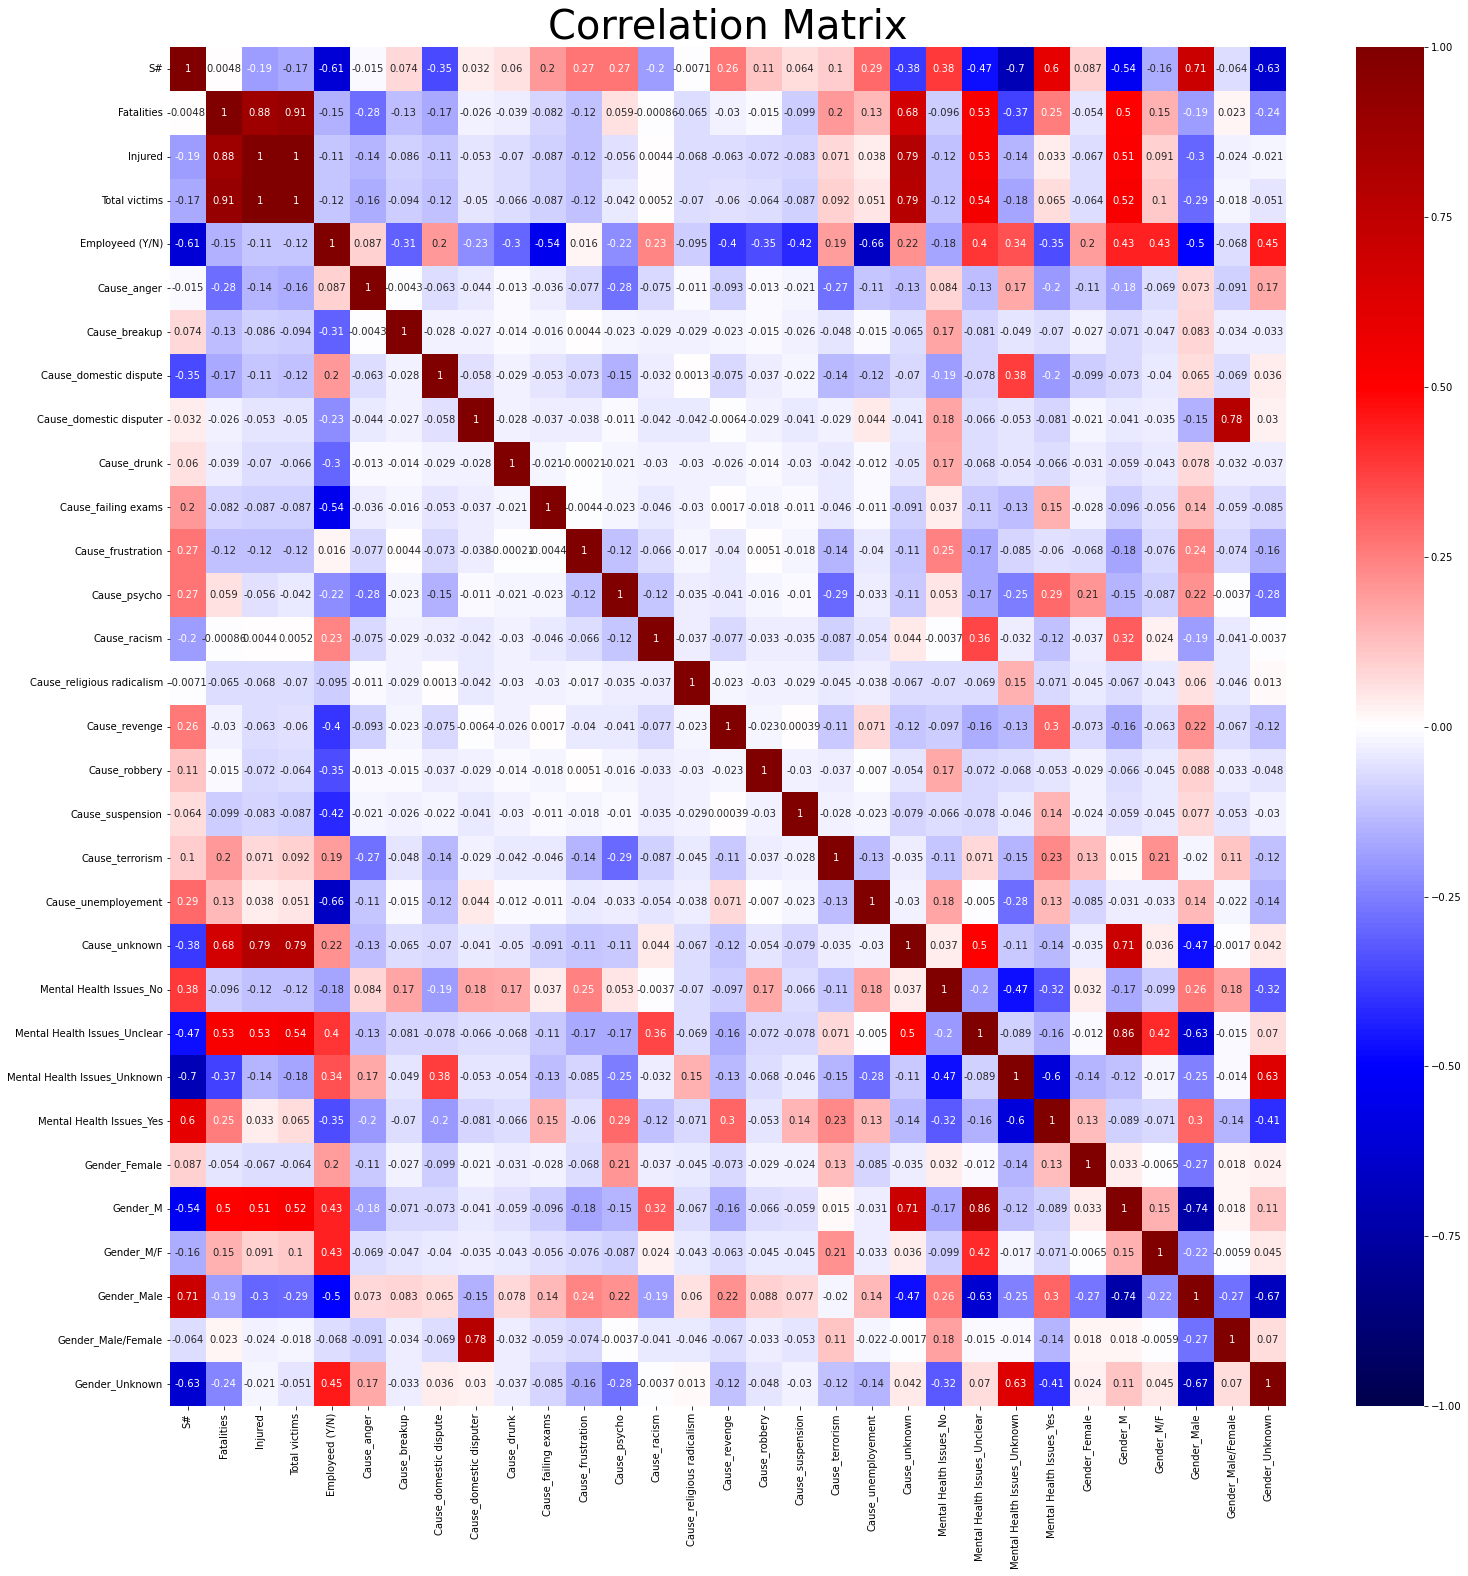

In [98]:
binarios_data_1=pd.get_dummies(shootings)
correlacion=binarios_data_1.corr(method='pearson')
plot_corr_matrix(correlacion)
#binarios_data_1

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

shootings.pop('Mental Health Issues')
#binarios_data_2=pd.get_dummies(shootings)
#merged_left = pd.merge(left=binarios_data_2,right=species_sub, how='left', left_on='species_id', right_on='species_id')
#sns.pairplot(binarios_data_1, hue="Mental Health Issues")

4          Yes
7          Yes
9          Yes
10         Yes
11         Yes
        ...   
80     Unclear
82     Unclear
156    Unclear
167    Unclear
219    Unclear
Name: Mental Health Issues, Length: 322, dtype: object